Last annotation:
Image path: ..\data\images\clear_sky\drone2.png
Mask (XYXY): [152, 50, 525, 248]


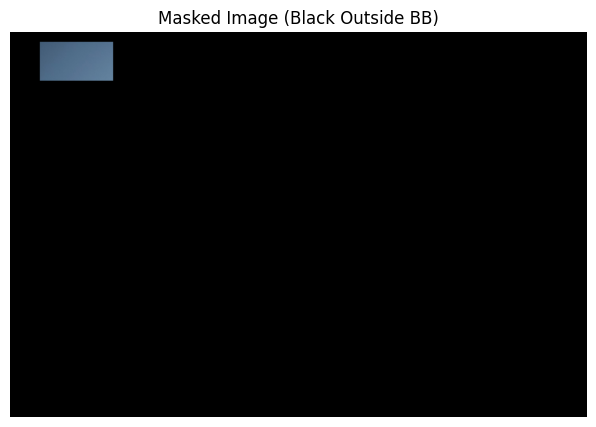

In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# ==========================================================
# DO NOT EDIT ABOVE
# ==========================================================

def show_last_mask(bboxes, base_image_dir="..\\data\\images"):
    if not bboxes:
        raise ValueError("No bounding boxes defined.")

    # Take last entry
    image_rel_path, x1, y1, x2, y2 = bboxes[-1]
    image_path = os.path.join(base_image_dir, image_rel_path)

    print("Last annotation:")
    print(f"Image path: {image_path}")
    print(f"Mask (XYXY): [{x1}, {y1}, {x2}, {y2}]")

    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image not found: {image_path}")

    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Failed to load image")

    h, w = img.shape[:2]

    # Clamp box to image size
    x1 = max(0, min(x1, w - 1))
    x2 = max(0, min(x2, w))
    y1 = max(0, min(y1, h - 1))
    y2 = max(0, min(y2, h))

    # Create binary mask
    mask = np.zeros((h, w), dtype=np.uint8)
    mask[y1:y2, x1:x2] = 1

    # Create black image
    masked_img = np.zeros_like(img)

    # Copy original pixels ONLY inside mask
    masked_img[mask == 1] = img[mask == 1]

    # Convert to RGB for matplotlib
    masked_img = cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB)

    # Show
    plt.figure(figsize=(8, 5))
    plt.imshow(masked_img)
    plt.title("Masked Image (Black Outside BB)")
    plt.axis("off")
    plt.show()

    return mask


# ==========================================================
# MANUAL MASK LIST (EDIT ONLY THIS PART)
# ==========================================================

bboxes = [
    ("clear_sky\\drone1.png", 152, 50, 525, 248),
    ("clear_sky\\drone2.png", 152, 50, 525, 248),


    # add more below ↓
]

mask = show_last_mask(bboxes)